# **Importing Libraries & Dataset**



In [ ]:
#importing libraries
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Mounted at /content/drive


In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

%matplotlib inline

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Crop_recommendation.csv')
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


# **Analyzing The Dataset**

In [ ]:
df.shape

(2200, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


**Let's have a closer look at the distribution of temperature and ph.**

It is symmetrical and bell shaped, showing that trials will usually give a result near the average, but will occasionally deviate by large amounts. It's also fascinating how these two really resemble each other!

<Axes: xlabel='ph', ylabel='Density'>

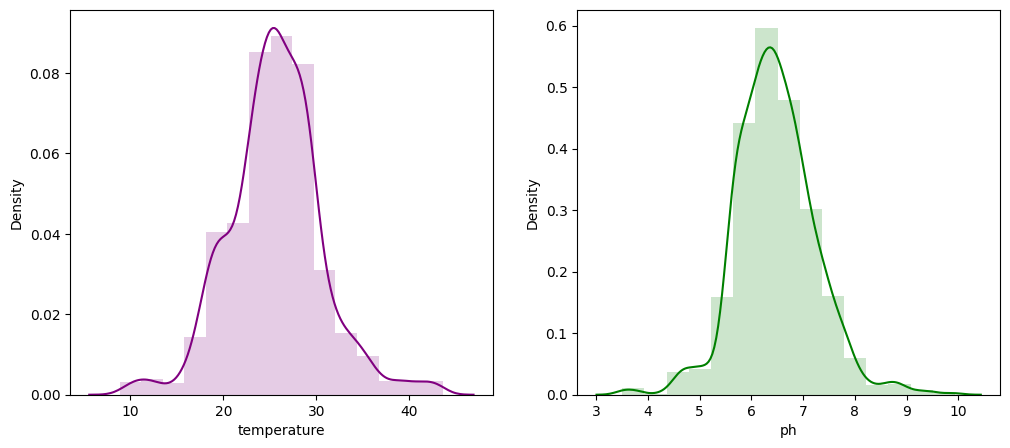

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
# sns.distplot(df_setosa['sepal_length'],kde=True,color='green',bins=20,hist_kws={'alpha':0.3})
sns.distplot(df['temperature'],color="purple",bins=15,hist_kws={'alpha':0.2})
plt.subplot(1, 2, 2)
sns.distplot(df['ph'],color="green",bins=15,hist_kws={'alpha':0.2})

This graph correlates with average potassium (K) and average nitrogen (N) value (both>50).
These soil ingredients direcly affects nutrition value of the food. Fruits which have high nutrients typically has consistent potassium values.

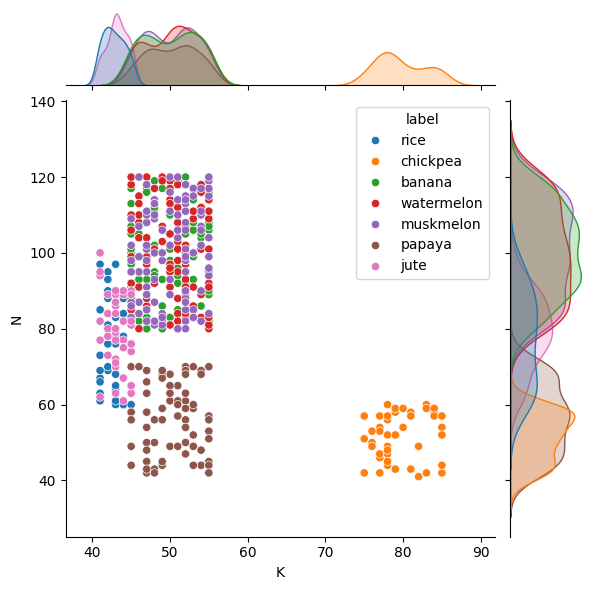

In [ ]:
sns.jointplot(x="K",y="N",data=df[(df['N']>40)&(df['K']>40)],hue="label")

# **Data Pre-Processing**

In [ ]:
c=df.label.astype('category')
targets = dict(enumerate(c.cat.categories))
df['target']=c.cat.codes

y=df.target
X=df[['N','P','K','temperature','humidity','ph','rainfall']]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 120.4 KB


**Correlation visualization between features. We can see how Phosphorous levels and Potassium levels are highly correlated.**

<Axes: >

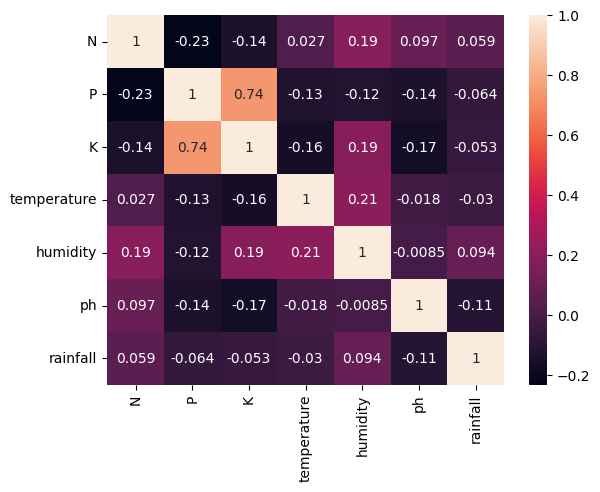

In [ ]:
sns.heatmap(X.corr(),annot=True)

# **Feature Scaling**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# we must apply the scaling to the test set as well that we are computing for the training set
X_test_scaled = scaler.transform(X_test)

# **Model Selection**

KNN Classifier for Crop prediction

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)

0.9781818181818182

Confusion Matrix

<Axes: >

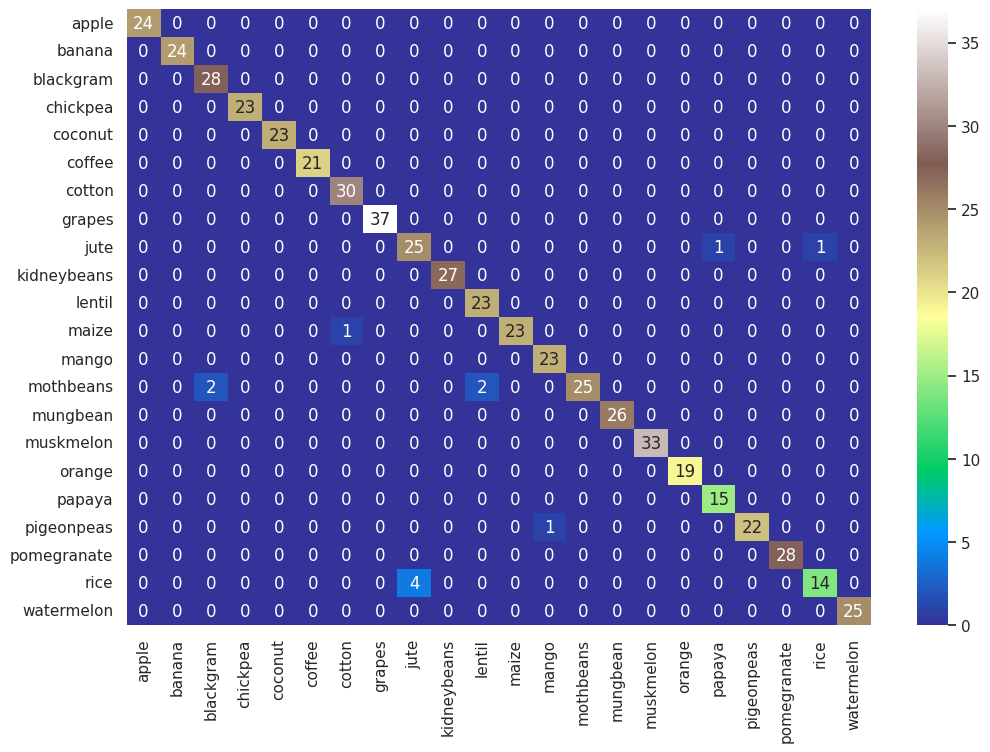

In [ ]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_test,knn.predict(X_test_scaled))
df_cm = pd.DataFrame(mat, list(targets.values()), list(targets.values()))
sns.set(font_scale=1.0) # for label size
plt.figure(figsize = (12,8))
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12},cmap="terrain")

**POINTS TO BE HIGHLIGHTED**

* Interestingly liner kernel also gives satisfactory results but fine tuning increases the computation and might be inefficient in some cases
* The accuracy can be increased in poly kernel by tweaking parameters but might lead to intensive overfitting.
* RBF has better result than linear kernel.
* Poly kernel so far wins by a small margin.

**Classifying using decision tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
clf.score(X_test,y_test)

0.9872727272727273

Let's visualize the import features which are taken into consideration by decision trees

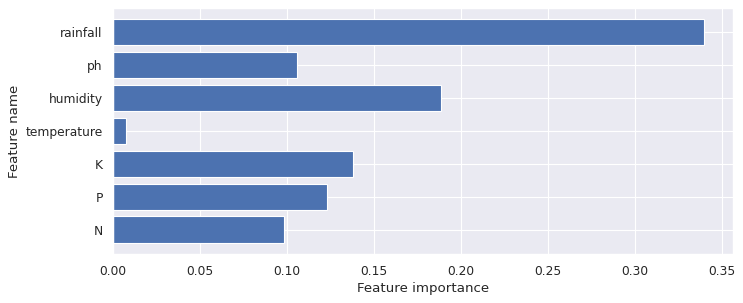

In [ ]:
plt.figure(figsize=(10,4), dpi=80)
c_features = len(X_train.columns)
plt.barh(range(c_features), clf.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(np.arange(c_features), X_train.columns)
plt.show()

**Classification using Random Forest**

In [ ]:
'''
max depth and n_estimator are important to fine tune otherwise trees will be densely graphed which will be a classic case of overfitting. max_depth=4 and n_estimators=10 gives pretty much satisfying results by making sure model is able to generalize well.
'''

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=4,n_estimators=100,random_state=42).fit(X_train, y_train)

print('RF Accuracy on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('RF Accuracy on test set: {:.2f}'.format(clf.score(X_test, y_test)))

RF Accuracy on training set: 0.97
RF Accuracy on test set: 0.97


# Encoding

In [ ]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
df['crop_num']=df['label'].map(crop_dict)

In [ ]:
df

,N,P,K,temperature,humidity,ph,rainfall,label,target,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20,1
...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,5,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,5,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,5,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,5,22


# **Test Train Split**

In [ ]:
X = df.drop(['crop_num','label','target','temperature'],axis=1)
y = df['crop_num']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,N,P,K,humidity,ph,rainfall
1656,17,16,14,92.181519,6.625539,102.944161
752,37,79,19,69.347863,7.143943,69.408782
892,7,73,25,63.132153,7.288057,45.208411
1041,101,70,48,75.031933,6.012697,116.553145
1179,0,17,30,47.972305,6.279134,97.790725
...,...,...,...,...,...,...
1638,10,5,5,91.353492,7.817846,112.983436
1095,108,94,47,84.546250,6.387431,90.812505
1130,11,36,31,51.779659,6.475449,100.258567
1294,11,124,204,80.066340,6.361141,71.400430


# **Scale The Features Using MinMaxScaler**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)
X_train

array([[0.12142857, 0.07857143, 0.045     , 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , 0.56099735, 0.54465022,
        0.11879596]])

# **Standarization**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[-9.03426596e-01, -1.12616170e+00, -6.68506601e-01,
         9.36586183e-01,  1.93473784e-01,  5.14970176e-03],
       [-3.67051340e-01,  7.70358846e-01, -5.70589522e-01,
        -1.00470485e-01,  8.63917548e-01, -6.05290566e-01],
       [-1.17161422e+00,  5.89737842e-01, -4.53089028e-01,
        -3.82774991e-01,  1.05029771e+00, -1.04580687e+00],
       ...,
       [-1.06433917e+00, -5.24091685e-01, -3.35588533e-01,
        -8.98381379e-01, -6.34357580e-04, -4.37358211e-02],
       [-1.06433917e+00,  2.12501638e+00,  3.05234239e+00,
         3.86340190e-01, -1.48467347e-01, -5.69036842e-01],
       [-5.01145154e-01,  7.40255346e-01, -5.11839275e-01,
        -4.18045489e-01,  6.86860180e-01, -8.96531475e-01]])

# **Training Models**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}


for name, md in models.items():
    md.fit(X_train,y_train)
    ypred = md.predict(X_test)

    print(f"{name}  with accuracy : {accuracy_score(y_test,ypred)}")

Logistic Regression  with accuracy : 0.9545454545454546
Naive Bayes  with accuracy : 0.9886363636363636
Support Vector Machine  with accuracy : 0.9659090909090909
K-Nearest Neighbors  with accuracy : 0.9613636363636363
Decision Tree  with accuracy : 0.9818181818181818
Random Forest  with accuracy : 0.990909090909091
Bagging  with accuracy : 0.9863636363636363
AdaBoost  with accuracy : 0.1409090909090909
Gradient Boosting  with accuracy : 0.9840909090909091
Extra Trees  with accuracy : 0.8795454545454545


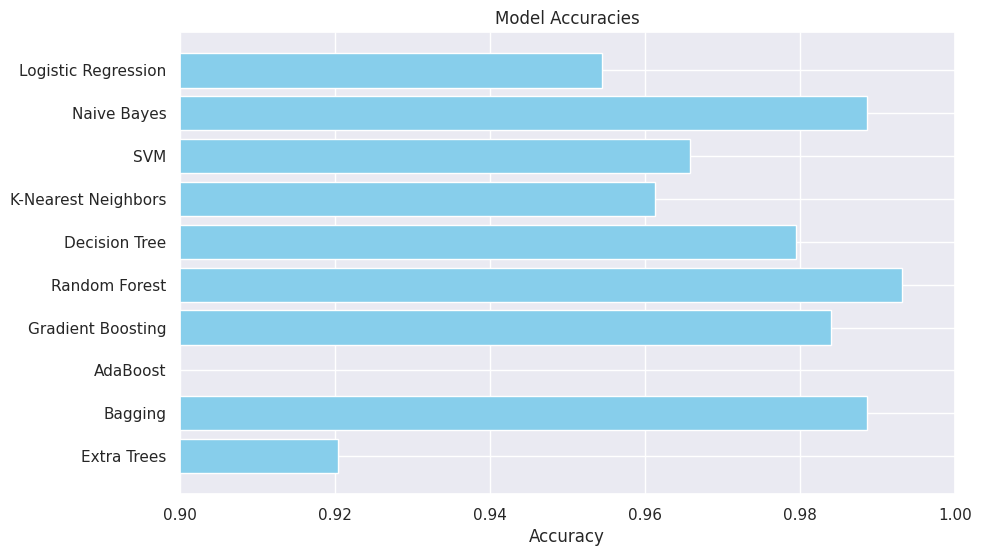

In [ ]:
import matplotlib.pyplot as plt
# Data
models = ['Logistic Regression', 'Naive Bayes', 'SVM', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'AdaBoost', 'Bagging', 'Extra Trees']
accuracies = [0.954545454546, 0.98863636363636, 0.96590909090909, 0.96136363636363,0.97954545454545, 0.99318181818182, 0.98409090909091, 0.14090909090909, 0.98863636363636, 0.92045454545454]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(models, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracies')
plt.xlim(0.9,1)  # Adjust the limit to make differences more visible
plt.gca().invert_yaxis()  # Invert y-axis to have the highest accuracy at the top
plt.show()

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
ypred = rfc.predict(X_test)
accuracy_score(y_test,ypred)
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))


              precision    recall  f1-score   support

           1       1.00      0.79      0.88        19
           2       1.00      1.00      1.00        21
           3       0.85      1.00      0.92        23
           4       1.00      1.00      1.00        17
           5       1.00      1.00      1.00        27
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        14
           8       1.00      1.00      1.00        23
           9       1.00      1.00      1.00        17
          10       1.00      1.00      1.00        19
          11       1.00      1.00      1.00        14
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00        21
          14       1.00      1.00      1.00        23
          15       0.92      1.00      0.96        11
          16       1.00      1.00      1.00        20
          17       1.00      1.00      1.00        19
          18       1.00    

# **Predictive System**

In [ ]:
def recommendation(N,P,k,humidity,ph,rainfal):
    features = np.array([[N,P,k,humidity,ph,rainfal]])
    transformed_features = ms.transform(features)
    transformed_features = sc.transform(transformed_features)
    prediction = rfc.predict(transformed_features).reshape(1,-1)

    return prediction[0]

In [ ]:
N = 80
P = 60
k = 40
temperature = 25.0
humidity = 80
ph = 6.5
rainfall = 240


predict = recommendation(N,P,k,humidity,ph,rainfall)


crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

if predict[0] in crop_dict:
    crop = crop_dict[predict[0]]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")

Rice is a best crop to be cultivated 
